<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                2170 non-null   int64
 1   Gender              2170 non-null   int64
 2   Policy_Stu          2170 non-null   int64
 3   Minority_Stu        2170 non-null   int64
 4   Poor_Stu            2170 non-null   int64
 5   Father_Edu          2170 non-null   int64
 6   Mother_Edu          2170 non-null   int64
 7   Father_Occupation   2170 non-null   int64
 8   Mother_Occupation   2170 non-null   int64
 9   Time_Friends        2170 non-null   int64
 10  Time_SocicalMedia   2170 non-null   int64
 11  Time_Studying       2170 non-null   int64
 12  GPA                 2170 non-null   int64
 13  Adapt_Learning_Uni  2170 non-null   int64
 14  Study_Methods       2170 non-null   int64
 15  SupportOf_Uni       2170 non-null   int64
 16  SupportOf_Lec       2170 non-null   int64


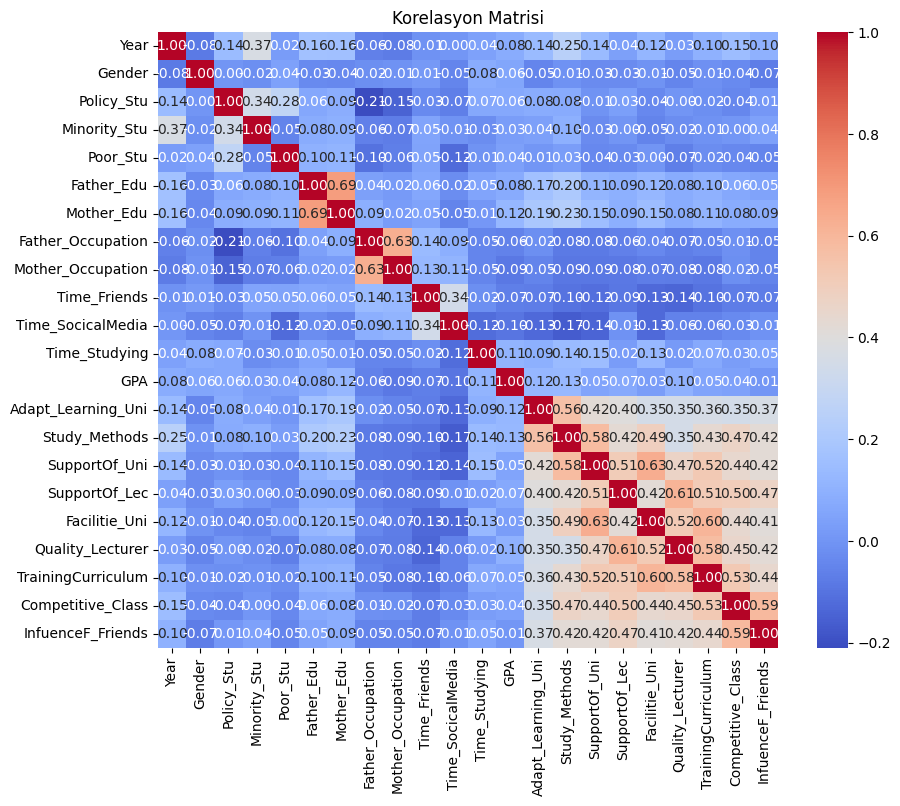

Orijinal sınıf dağılımı:
 GPA_Class
High      1988
Medium     109
Low         73
Name: count, dtype: int64
Oversampling sonrası sınıf dağılımı:
 GPA_Class
High      1988
Medium    1988
Low       1988
Name: count, dtype: int64
Doğruluk: 0.9798826487845766
Sınıflandırma Raporu:
               precision    recall  f1-score   support

        High       0.97      0.98      0.97       402
         Low       0.99      0.99      0.99       376
      Medium       0.98      0.98      0.98       415

    accuracy                           0.98      1193
   macro avg       0.98      0.98      0.98      1193
weighted avg       0.98      0.98      0.98      1193

Confusion Matrix:
 [[392   2   8]
 [  4 371   1]
 [  9   0 406]]


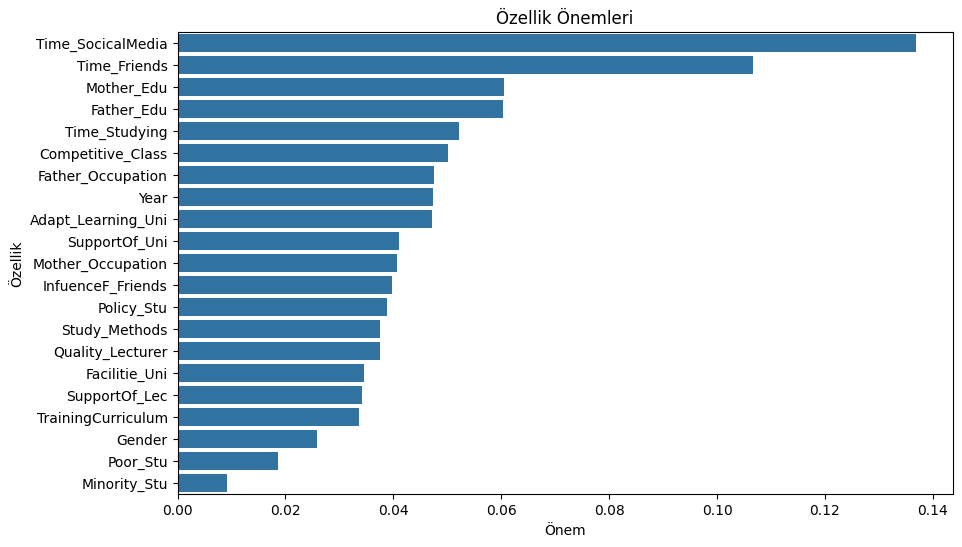

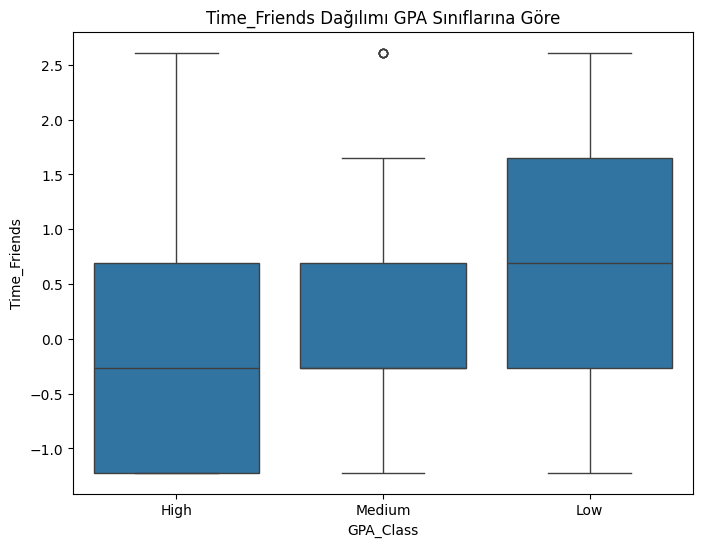

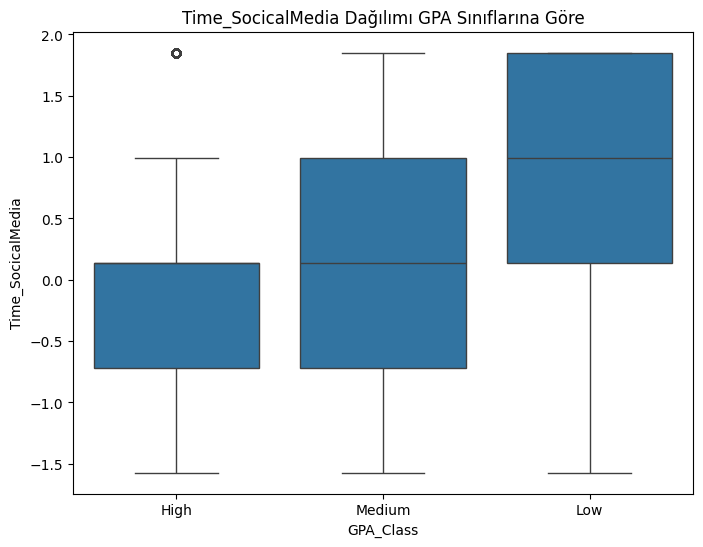

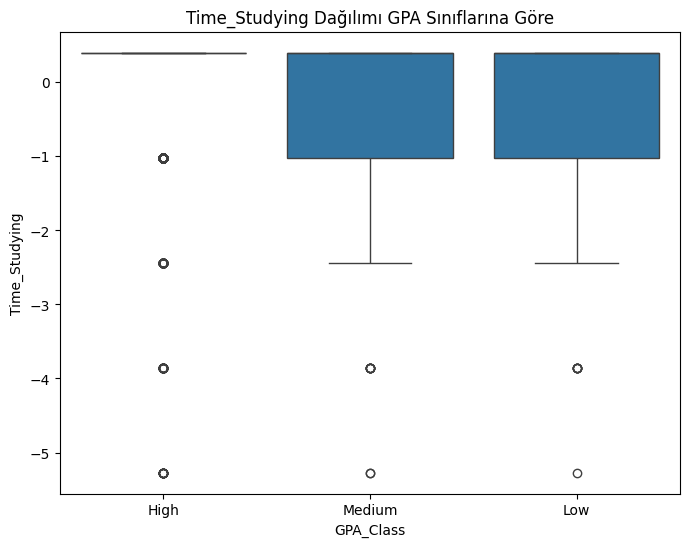

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE  # imblearn yüklü değilse: pip install imblearn

# Veri yükleme
data = pd.read_excel('paper.xlsx')

# Veri genel bilgisi ve önizleme
print(data.info())
print(data.head())

# Eksik veri kontrolü
print("Eksik veriler:\n", data.isnull().sum())

# GPA'yı sınıflara ayırma
def gpa_to_label(gpa):
    if gpa >= 3.0:
        return 'High'
    elif gpa >= 2.0:
        return 'Medium'
    else:
        return 'Low'

data['GPA_Class'] = data['GPA'].apply(gpa_to_label)

# Eksik verileri temizleme
data = data.dropna()

# Sayısal sütunlar
numeric_columns = ['Time_Friends', 'Time_SocicalMedia', 'Time_Studying']
numeric_columns = [col for col in numeric_columns if col in data.columns]

# Sayısal sütunları ölçeklendirme
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Hedef değişken ve özellikler
y = data['GPA_Class']
X = data.drop(['GPA', 'GPA_Class'], axis=1)

# Korelasyon matrisi görselleştirme
# Korelasyon matrisi (sayısal sütunlarla)
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


# Orijinal sınıf dağılımı
print("Orijinal sınıf dağılımı:\n", y.value_counts())

# SMOTE ile oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Oversampling sonrası sınıf dağılımı:\n", pd.Series(y_resampled).value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model eğitimi
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Performans sonuçları
print("Doğruluk:", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Özellik önemleri grafiği
feature_importances = pd.DataFrame({
    'Özellik': X.columns,
    'Önem': model.feature_importances_
}).sort_values(by='Önem', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Önem', y='Özellik', data=feature_importances)
plt.title("Özellik Önemleri")
plt.show()

# Boxplot ile sayısal değişkenlerin GPA sınıflarına göre dağılımı
for col in numeric_columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='GPA_Class', y=col, data=data)
    plt.title(f"{col} Dağılımı GPA Sınıflarına Göre")
    plt.show()